### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in Data from the VROD excel- Run only once for creating the Project csv

In [ ]:
# Path to your Excel file
excel_file_path = '../data/VROD_v11_latest.xlsx'

# Name of the sheet you want to export
sheet_name = 'PROJECTS' 

# Read the specific sheet
df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header = None)

df.columns = df.iloc[3] 
# # Remove the first two rows
df = df.iloc[4:]
df.reset_index(drop=True, inplace=True)
# # Export the DataFrame to CSV
csv_file_path = '../data/PROJECTS_V11.csv'
df.to_csv(csv_file_path, index=False)

In [ ]:
##Starting from below after the first checkpoint

In [2]:
projects_df = pd.read_csv("../data/projects_table_rules_final_all_projects.csv", low_memory=False)
#methodologies_df = pd.read_csv("../data/projects_table_rules_final_all_projects.csv", low_memory=False)


In [3]:
projects_df.columns

Index(['Project ID', 'Project Name', 'Voluntary Registry', 'Voluntary Status',
       'Reduction/Removal', 'Type from Registry', 'Region', 'Country', 'State',
       'Project Site Location', 'Project Developer', 'ARB/WA Project',
       'ARB Project Type', 'ARB Harmonized Methodology',
       'CAR Harmonized Methodology', 'Methodology/Protocol',
       'Harmonized Methodology/Protocol',
       'Fully Harmonized Methodology/Protocol', 'Version String',
       'Rule-Based Type Mapping Full', 'Rule-Based Type Mapping First', 'Type',
       'Match?'],
      dtype='object')

In [4]:
projects_df.shape

(9088, 23)

In [5]:
projects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9088 entries, 0 to 9087
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Project ID                             9088 non-null   object 
 1   Project Name                           9087 non-null   object 
 2   Voluntary Registry                     9088 non-null   object 
 3   Voluntary Status                       8765 non-null   object 
 4   Reduction/Removal                      0 non-null      float64
 5   Type from Registry                     9088 non-null   object 
 6   Region                                 3923 non-null   object 
 7   Country                                9082 non-null   object 
 8   State                                  1641 non-null   object 
 9   Project Site Location                  1642 non-null   object 
 10  Project Developer                      9087 non-null   object 
 11  ARB/

## Explore Data

In [6]:
projects_df.head()

,Project ID,Project Name,Voluntary Registry,Voluntary Status,Reduction/Removal,Type from Registry,Region,Country,State,Project Site Location,Project Developer,ARB/WA Project,ARB Project Type,ARB Harmonized Methodology,CAR Harmonized Methodology,Methodology/Protocol,Harmonized Methodology/Protocol,Fully Harmonized Methodology/Protocol,Version String,Rule-Based Type Mapping Full,Rule-Based Type Mapping First,Type,Match?
0,ACR586,18 Reserves Forest Carbon Project,ACR,Registered,NaN,Forest Carbon,NaN,US,OHIO,Near Cleveland,The Climate Trust,No,NaN,NaN,NaN,Improved Forest Management (IFM) on Non-Federa...,ACR Improved Forest Management (IFM) on Non-Fe...,ACR Improved Forest Management (IFM) on Non-Fe...,NaN,"[(86, 'Improved Forest Management')]",Improved Forest Management,Improved Forest Management,True
1,ACR206,2014-P4,ACR,NaN,NaN,Ozone Depleting Substances,NaN,US,ARKANSAS,El Dorado,EOS Climate Inc,Compliance,ODS,ARB Compliance Offset Protocol: Destruction of...,NaN,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,NaN,"[(0, 'Ozone Depleting Substances Recovery & De...",Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction,True
2,ACR203,2014-P5,ACR,NaN,NaN,Ozone Depleting Substances,NaN,US,ARKANSAS,El Dorado,EOS Climate Inc,No,NaN,NaN,NaN,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,NaN,"[(63, 'Ozone Depleting Substances Recovery & D...",Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction,True
3,ACR521,A-Gas 1-2020,ACR,NaN,NaN,Ozone Depleting Substances,NaN,US,OHIO,Bowling Green,A-Gas US Inc.,Compliance,ODS,ARB Compliance Offset Protocol: Destruction of...,NaN,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,NaN,"[(0, 'Ozone Depleting Substances Recovery & De...",Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction,True
4,ACR522,A-Gas 2-2020,ACR,NaN,NaN,Ozone Depleting Substances,NaN,US,OHIO,Bowling Green,A-Gas US Inc.,Compliance,ODS,ARB Compliance Offset Protocol: Destruction of...,NaN,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,NaN,"[(0, 'Ozone Depleting Substances Recovery & De...",Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction,True


## Data Cleanup and Preprocessing

In [7]:
# Cleaning up the Feature names to remove newline char, trim spaces, add lowercase and and replace "/" and " " by "or" and "_"
cleaned_column_names = projects_df.columns.str.strip().str.lower().str.replace('\n', '').str.replace('/', 'or').str.replace(' ', '_').str.replace('__', '_')

In [8]:
# Apply the cleaned column names to the DataFrame
projects_df.columns = cleaned_column_names

In [9]:
# Identify columns that match the pattern of years using regex
columns_to_drop = projects_df.columns[projects_df.columns.str.match(r'^\d{4}')]

In [10]:
# Dropping the specified columns
projects_df.drop(columns=columns_to_drop, inplace=True)

In [11]:
null_counts = projects_df.isnull().sum()
null_counts

project_id                                   0
project_name                                 1
voluntary_registry                           0
voluntary_status                           323
reductionorremoval                        9088
type_from_registry                           0
region                                    5165
country                                      6
state                                     7447
project_site_location                     7446
project_developer                            1
arborwa_project                              0
arb_project_type                          8491
arb_harmonized_methodology                8491
car_harmonized_methodology                8184
methodologyorprotocol                      101
harmonized_methodologyorprotocol          1020
fully_harmonized_methodologyorprotocol     101
version_string                            7621
rule-based_type_mapping_full                 0
rule-based_type_mapping_first             3624
type         

In [15]:
print(projects_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9088 entries, 0 to 9087
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   project_id                              9088 non-null   object 
 1   project_name                            9087 non-null   object 
 2   voluntary_registry                      9088 non-null   object 
 3   voluntary_status                        8765 non-null   object 
 4   reductionorremoval                      0 non-null      float64
 5   type_from_registry                      9088 non-null   object 
 6   region                                  3923 non-null   object 
 7   country                                 9082 non-null   object 
 8   state                                   1641 non-null   object 
 9   project_site_location                   1642 non-null   object 
 10  project_developer                       9087 non-null   obje

In [13]:
#Remove the project with Null name
project=projects_df[(projects_df["project_name"].isna()) | (projects_df["type"].isna())]

project

,project_id,project_name,voluntary_registry,voluntary_status,reductionorremoval,type_from_registry,region,country,state,project_site_location,project_developer,arborwa_project,arb_project_type,arb_harmonized_methodology,car_harmonized_methodology,methodologyorprotocol,harmonized_methodologyorprotocol,fully_harmonized_methodologyorprotocol,version_string,rule-based_type_mapping_full,rule-based_type_mapping_first,type,match?
7819,VCS2240,NaN,VCS,Withdrawn,NaN,Energy industries (renewable/non-renewable sou...,NaN,United States,NaN,NaN,Southern Power Company,No,NaN,NaN,NaN,ACM0002,ACM0002 Grid-connected electricity generation ...,ACM0002 Grid-connected electricity generation ...,NaN,[],NaN,RE Bundled,False
9081,VCS2177,failed,VCS,Withdrawn,NaN,Agriculture Forestry and Other Land Use,Africa,Madagascar,NaN,NaN,MER,No,NaN,NaN,NaN,VM0007,VM0007 REDD+ Methodology Framework (REDD-MF),VM0007 REDD+ Methodology Framework (REDD-MF),NaN,[],NaN,NaN,True


In [17]:
## Drop the projects with null types
final_projects = projects_df.dropna(subset=["type"])

In [18]:
Inactive_projects = final_projects[final_projects["voluntary_status"]== "Inactive"]
print(Inactive_projects.shape)
Inactive_projects.head()

(194, 23)


,project_id,project_name,voluntary_registry,voluntary_status,reductionorremoval,type_from_registry,region,country,state,project_site_location,project_developer,arborwa_project,arb_project_type,arb_harmonized_methodology,car_harmonized_methodology,methodologyorprotocol,harmonized_methodologyorprotocol,fully_harmonized_methodologyorprotocol,version_string,rule-based_type_mapping_full,rule-based_type_mapping_first,type,match?
134,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,Inactive,NaN,Forest Carbon,NaN,MG,Miandrivazo,Ankotrofotsy,Tany Meva Foundation,No,NaN,NaN,NaN,AR-ACM0001,AR-ACM0001 Afforestation and reforestation of ...,AR-ACM0001 Afforestation and reforestation of ...,NaN,"[(107, 'Afforestation/Reforestation')]",Afforestation/Reforestation,Afforestation/Reforestation,True
221,ACR186,Devil Fire Reforestation,ACR,Inactive,NaN,Forest Carbon,NaN,US,CALIFORNIA,Susanville,"W. M. Beaty & Associates, Inc.",No,NaN,NaN,NaN,Climate Action Reserve Forest Project Protocol,CAR U.S. Forest Protocol,CAR U.S. Forest Protocol,NaN,[],NaN,Afforestation/Reforestation,False
550,ACR116,Societe VERAMA Madagascar Afforestation Project,ACR,Inactive,NaN,Forest Carbon,NaN,MG,Antonibe,Masiloka Peninsula,Societe VERAMA,No,NaN,NaN,NaN,AR-ACM0001,AR-ACM0001 Afforestation and reforestation of ...,AR-ACM0001 Afforestation and reforestation of ...,NaN,"[(107, 'Afforestation/Reforestation')]",Afforestation/Reforestation,Afforestation/Reforestation,True
569,ACR187,Storrie Fire Reforestation,ACR,Inactive,NaN,Forest Carbon,NaN,US,CALIFORNIA,Chester,"W. M. Beaty & Associates, Inc.",No,NaN,NaN,NaN,Climate Action Reserve Forest Project Protocol,CAR U.S. Forest Protocol,CAR U.S. Forest Protocol,NaN,[],NaN,Afforestation/Reforestation,False
5513,VCS4179,BAMBOO PLANTATION BASED GROUPED PROJECT IN INDIA,VCS,Inactive,NaN,Agriculture Forestry and Other Land Use,Asia,India,NaN,NaN,Carbonwatch India Private Limited,No,NaN,NaN,NaN,AR-ACM0003,AR-ACM0003 Afforestation and reforestation of ...,AR-ACM0003 Afforestation and reforestation of ...,NaN,"[(106, 'Afforestation/Reforestation')]",Afforestation/Reforestation,Afforestation/Reforestation,True


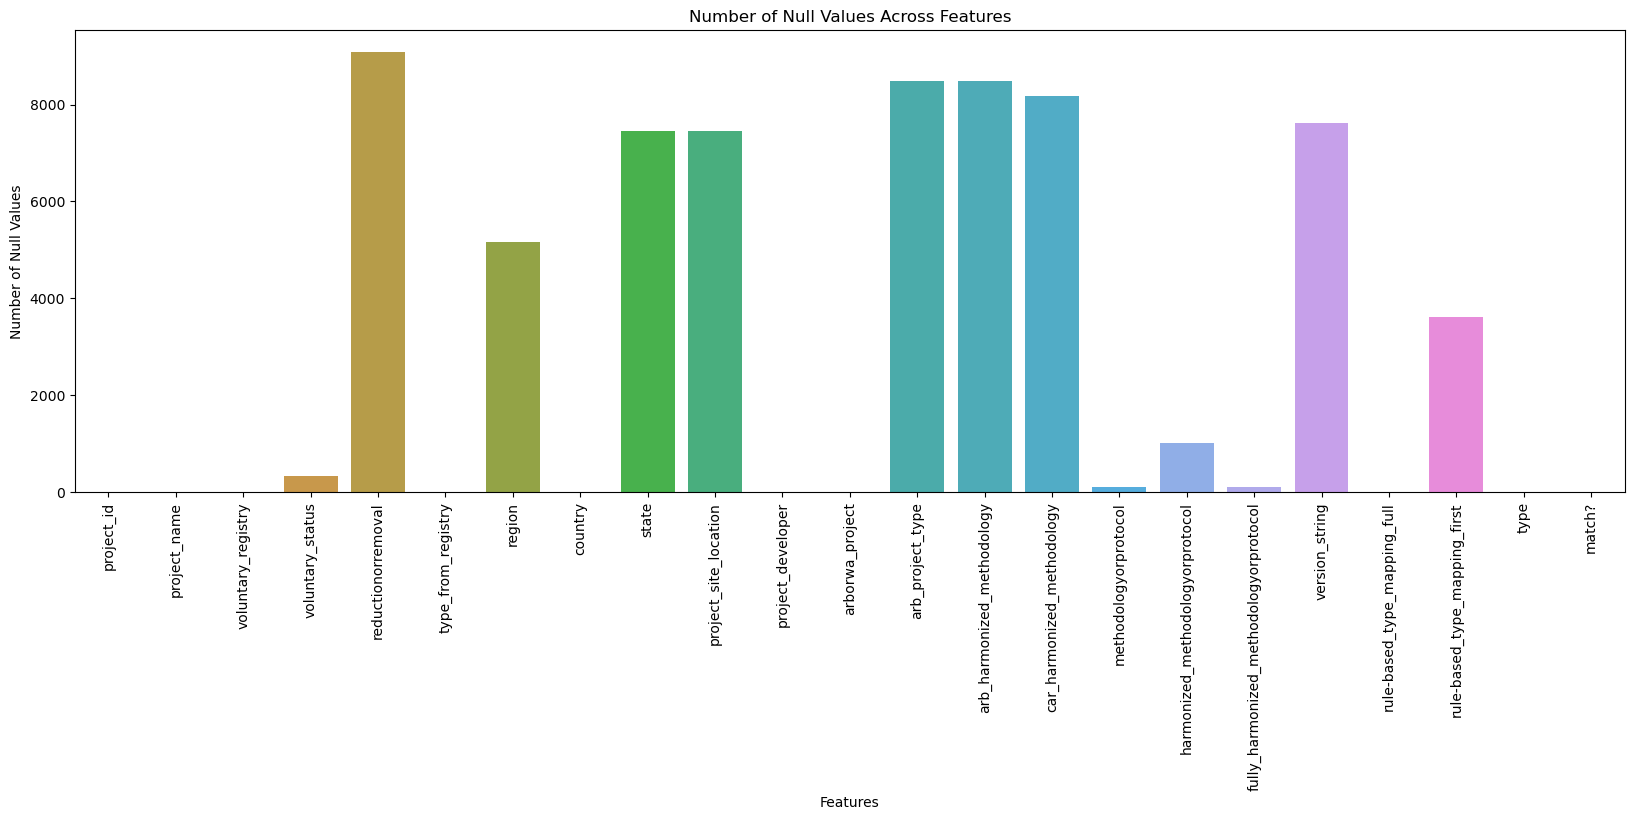

In [20]:
# Calculate the number of null values for each column
null_counts = final_projects.isnull().sum()

# Plot the number of null values using a bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xlabel('Features')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values Across Features')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Generate the value counts for the 'Scope' column
type_counts = final_projects['type'].value_counts()
type_counts

type
Cookstoves                                           1434
Wind                                                 1014
Improved Forest Management                            756
Hydropower                                            529
Afforestation/Reforestation                           473
Manure Methane Digester                               449
Clean Water                                           412
Landfill Methane                                      382
Solar - Centralized                                   322
Ozone Depleting Substances Recovery & Destruction     292
Rice Emission Reductions                              292
Biomass                                               278
REDD+                                                 273
Community Boreholes                                   259
Biodigesters                                          243
Sustainable Agriculture                               165
Bundled Energy Efficiency                             156
Mine Meth

In [23]:
project_by_regions = final_projects.groupby(['region']).size().reset_index(name='Count')
project_by_regions

,region,Count
0,Africa,464
1,Asia,2421
2,Europe,84
3,Latin America,541
4,Middle East,188
5,North America,193
6,Oceania,31


In [53]:
# Calculate value counts for 'type' column
type_counts = final_projects['type'].value_counts()

types_to_group = type_counts[type_counts < 7].index

# Filter the DataFrame
other_type = final_projects[final_projects['type'].isin(types_to_group)]
print("Total Types :",len(types_to_group))
print("Shape of other_type dataframe:", other_type.shape)

Total Types : 23
Shape of other_type dataframe: (62, 23)


In [54]:
other_type.to_csv('../data/fewerthan7projects_after_RBA.csv', index=False)

In [55]:
# Remove the project types with less than 7 records from the dataset
final_projects_cleaned = final_projects[~final_projects['type'].isin(types_to_group)]


In [56]:
##Check if any duplicates in the records

duplicate_rows = final_projects_cleaned[final_projects_cleaned.duplicated()]
# Print the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [project_id, project_name, voluntary_registry, voluntary_status, reductionorremoval, type_from_registry, region, country, state, project_site_location, project_developer, arborwa_project, arb_project_type, arb_harmonized_methodology, car_harmonized_methodology, methodologyorprotocol, harmonized_methodologyorprotocol, fully_harmonized_methodologyorprotocol, version_string, rule-based_type_mapping_full, rule-based_type_mapping_first, type, match?]
Index: []


In [57]:
# Keeping only the features of interest
features_of_interest = ["project_id","project_name", "methodologyorprotocol",
                        "fully_harmonized_methodologyorprotocol", 
                        "region", "voluntary_registry", "type_from_registry",
                        "project_developer", "arborwa_project", "type",
                        "rule-based_type_mapping_first"]


In [58]:
project_df_wfoi = final_projects_cleaned[features_of_interest]
project_df_wfoi.head()

,project_id,project_name,methodologyorprotocol,fully_harmonized_methodologyorprotocol,region,voluntary_registry,type_from_registry,project_developer,arborwa_project,type,rule-based_type_mapping_first
0,ACR586,18 Reserves Forest Carbon Project,Improved Forest Management (IFM) on Non-Federa...,ACR Improved Forest Management (IFM) on Non-Fe...,NaN,ACR,Forest Carbon,The Climate Trust,No,Improved Forest Management,Improved Forest Management
1,ACR206,2014-P4,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,NaN,ACR,Ozone Depleting Substances,EOS Climate Inc,Compliance,Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction
2,ACR203,2014-P5,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,NaN,ACR,Ozone Depleting Substances,EOS Climate Inc,No,Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction
3,ACR521,A-Gas 1-2020,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,NaN,ACR,Ozone Depleting Substances,A-Gas US Inc.,Compliance,Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction
4,ACR522,A-Gas 2-2020,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,NaN,ACR,Ozone Depleting Substances,A-Gas US Inc.,Compliance,Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction


In [59]:
project_df_wfoi.shape

(9025, 11)

In [60]:
#Final check for nulls across dataset
null_counts = project_df_wfoi.isnull().sum()
null_counts

project_id                                   0
project_name                                 1
methodologyorprotocol                      101
fully_harmonized_methodologyorprotocol     101
region                                    5140
voluntary_registry                           0
type_from_registry                           0
project_developer                            0
arborwa_project                              0
type                                         0
rule-based_type_mapping_first             3596
dtype: int64

In [61]:
# Columns to fill with ''
object_columns = project_df_wfoi.select_dtypes(include='object').columns
fill_value_object = {col: ' ' for col in object_columns}

# Fill NaNs
project_df_wfoi = project_df_wfoi.fillna(fill_value_object)
final_count = project_df_wfoi.isnull().sum()
final_count

project_id                                0
project_name                              0
methodologyorprotocol                     0
fully_harmonized_methodologyorprotocol    0
region                                    0
voluntary_registry                        0
type_from_registry                        0
project_developer                         0
arborwa_project                           0
type                                      0
rule-based_type_mapping_first             0
dtype: int64

In [62]:
unique_counts = project_df_wfoi.apply(lambda x: x.nunique())
print("\nUnique Value Counts:")
print(unique_counts)


Unique Value Counts:
project_id                                9025
project_name                              8933
methodologyorprotocol                      316
fully_harmonized_methodologyorprotocol     299
region                                       8
voluntary_registry                           4
type_from_registry                         100
project_developer                         2965
arborwa_project                              3
type                                        56
rule-based_type_mapping_first               48
dtype: int64


In [ ]:
# Translate the project_name to english

In [ ]:
pip install langdetect

In [ ]:
pip install translate

In [ ]:
pip install googletrans==4.0.0-rc1

In [ ]:
from translate import Translator
from langdetect import detect
import time

# Initialize the translator
translator = Translator(to_lang="en")

# Function to detect language and translate project names
def translate_name(name):
    try:
        # Detect the language of the project name
        lang = detect(name)
        # If the detected language is not English, translate it
        if lang != 'en':
            translated = translator.translate(name, dest='en')
            return translated.text
        else:
            # If the language is English, return the original name
            return name
    except Exception as e:
        print(f"Error translating '{name}': {e}")
        return name

# Apply the translation function to the project_name column with retry logic
def translate_with_retry(name, retries=3):
    for i in range(retries):
        try:
            return translate_name(name)
        except Exception as e:
            print(f"Retry {i+1}/{retries} for '{name}' failed with error: {e}")
            time.sleep(1)  # wait for a second before retrying
    return name  # return the original name if all retries fail

# Apply the translation function to the project_name column
project_df_wfoi['project_name_english'] = project_df_wfoi['project_name'].apply(translate_name)

# Save the translated dataset
project_df_wfoi.to_csv('../data/translated_dataset.csv', index=False)

## Data Split

In [63]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df_w56types, test_df_w56types = train_test_split(project_df_wfoi, test_size=0.2, random_state=42, stratify=project_df_wfoi['type'])

In [64]:
#print shape of the split dataset
print(train_df_w56types.shape, test_df_w56types.shape)

(7220, 11) (1805, 11)


In [65]:
# Checkpoint 
# Save the DataFrames as CSV files
train_df_w56types.to_csv('../data/train_dataset_w56types.csv', index=False)
test_df_w56types.to_csv('../data/test_dataset_w56types.csv', index=False)

In [66]:
type_counts_train = train_df_w56types["type"].value_counts()
print(type_counts_train)
print("Total number of types",len(type_counts_train))

type
Cookstoves                                           1147
Wind                                                  811
Improved Forest Management                            605
Hydropower                                            423
Afforestation/Reforestation                           378
Manure Methane Digester                               359
Clean Water                                           330
Landfill Methane                                      306
Solar - Centralized                                   258
Ozone Depleting Substances Recovery & Destruction     234
Rice Emission Reductions                              234
Biomass                                               222
REDD+                                                 218
Community Boreholes                                   207
Biodigesters                                          195
Sustainable Agriculture                               132
Bundled Energy Efficiency                             125
Mine Meth

In [67]:
type_counts_test = test_df_w56types["type"].value_counts()
print(type_counts_test)
print("Total number of types", len(type_counts_test))

type
Cookstoves                                           287
Wind                                                 203
Improved Forest Management                           151
Hydropower                                           106
Afforestation/Reforestation                           95
Manure Methane Digester                               90
Clean Water                                           82
Landfill Methane                                      76
Solar - Centralized                                   64
Ozone Depleting Substances Recovery & Destruction     58
Rice Emission Reductions                              58
Biomass                                               56
REDD+                                                 55
Community Boreholes                                   52
Biodigesters                                          48
Sustainable Agriculture                               33
Bundled Energy Efficiency                             31
Mine Methane Capture      